<a href="https://colab.research.google.com/github/cristlper/bootcamp-data-sciente-2-alura/blob/main/Bootcamp_Data_Science_Alura_Projeto_Modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto do Módulo 1 de Análise de Dados do DATASUS

Projeto de análise de dados do DATASUS, utilizando os dados de produção hospitalar. Ele aborda a relação entre **gastos** e **internações**.

## 1. Importação das bibliotecas



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Leitura dos dados

In [ ]:
# URLs dos datasets
gastos_url = "https://github.com/cristlper/bootcamp-data-sciente-2-alura/raw/main/dados/gastos_hospitalares_brasil_jan_2008_ago_2020.csv"
internacoes_url = "https://github.com/cristlper/bootcamp-data-sciente-2-alura/raw/main/dados/internacoes_hospitalares_brasil_jan_2008_ago_2020.csv"

gastos = pd.read_csv(gastos_url, encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",", engine='python')
internacoes = pd.read_csv(internacoes_url, encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",", engine='python')

## 3. Limpeza e preparação dos dados

In [ ]:
# Renomeando colunas para facilitar a manipulação
gastos.rename(columns={'Unidade da Federação': 'Estado'}, inplace=True)
internacoes.rename(columns={'Unidade da Federação': 'Estado'}, inplace=True)

# Transformar os dados de valores para numéricos
def converter_para_numerico(df):
    for col in df.columns[1:]:  # Ignorando a coluna do Estado
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(".", "", regex=False)
            .str.replace(",", ".", regex=False)
            .replace("-", "0")  # Substituir "-" por "0"
            .astype(float)
        )
    return df

gastos = converter_para_numerico(gastos)
internacoes = converter_para_numerico(internacoes)

# Criando colunas de totais
gastos['Total'] = gastos.iloc[:, 1:].sum(axis=1)
internacoes['Total'] = internacoes.iloc[:, 1:].sum(axis=1)

# Juntando os datasets
dados = pd.merge(gastos[['Estado', 'Total']], internacoes[['Estado', 'Total']], on='Estado', suffixes=('_Gastos', '_Internacoes'))
dados["Custo por Internacao"] = dados["Total_Gastos"] / dados["Total_Internacoes"]

## 4. Análise exploratória

In [ ]:
# Estatísticas descritivas
print("\nEstatísticas Descritivas:")
print(dados.describe())

# Correlação entre gastos e internações
print("\nCorrelação:")
print(dados[['Total_Gastos', 'Total_Internacoes', 'Custo por Internacao']].corr())


Estatísticas Descritivas:
       Total_Gastos  Total_Internacoes  Custo por Internacao
count  2.700000e+01       2.700000e+01             27.000000
mean   1.116874e+12       1.061120e+07          90575.124104
std    1.531060e+12       1.221584e+07          23427.375304
min    5.639634e+10       8.855500e+05          54156.770259
25%    2.965729e+11       4.151929e+06          67555.483605
50%    4.723031e+11       5.527784e+06          90758.993705
75%    1.455519e+12       1.295400e+07         109588.850914
max    7.330679e+12       5.967982e+07         135324.492071

Correlação:
                      Total_Gastos  Total_Internacoes  Custo por Internacao
Total_Gastos              1.000000           0.988370              0.637471
Total_Internacoes         0.988370           1.000000              0.565211
Custo por Internacao      0.637471           0.565211              1.000000


## 5. Comparação entre estados

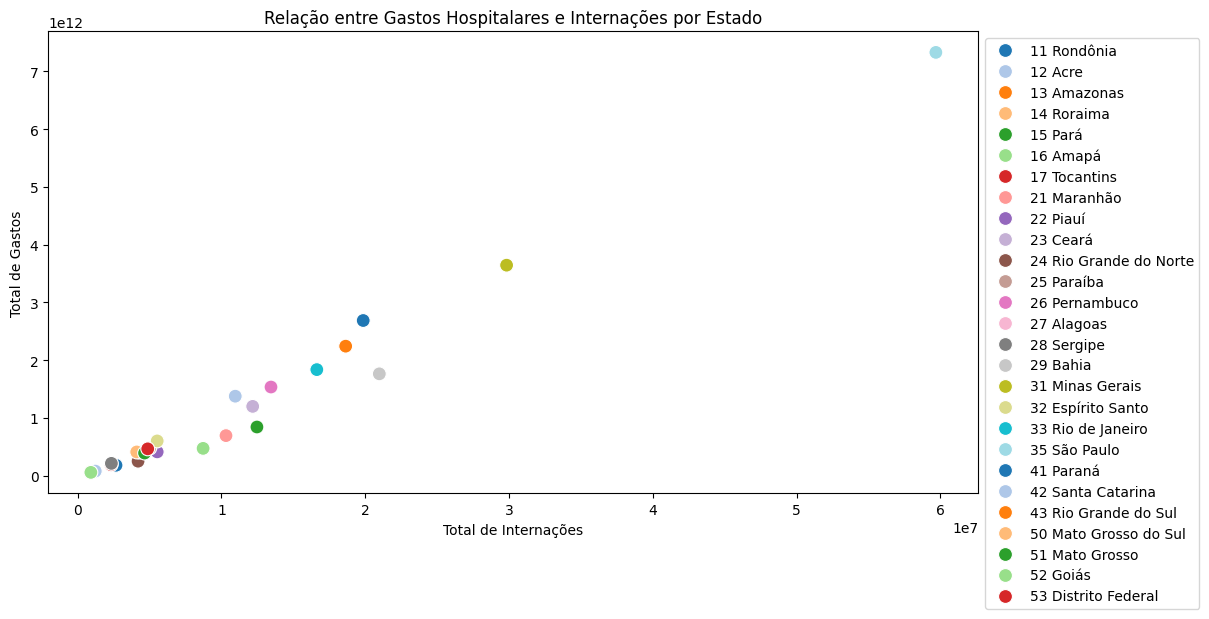

<ipython-input-5-6f53fc1737f1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_estados, x="Custo por Internacao", y="Estado", palette="Reds_r")


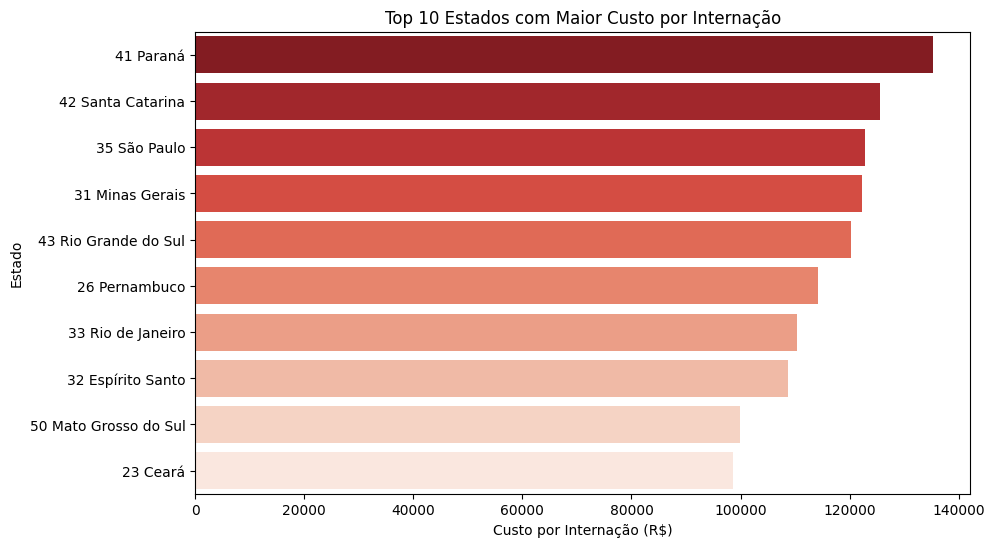

In [ ]:
# Plotando relação entre gastos e internações
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dados, x="Total_Internacoes", y="Total_Gastos", hue="Estado", palette="tab20", s=100)
plt.xlabel("Total de Internações")
plt.ylabel("Total de Gastos")
plt.title("Relação entre Gastos Hospitalares e Internações por Estado")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Estados com maior custo por internação
top_estados = dados.sort_values("Custo por Internacao", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_estados, x="Custo por Internacao", y="Estado", palette="Reds_r")
plt.xlabel("Custo por Internação (R$)")
plt.ylabel("Estado")
plt.title("Top 10 Estados com Maior Custo por Internação")
plt.show()

## 6. Conclusões e hipóteses

### Conclusões:
* Existe uma correlação positiva entre os gastos hospitalares e o número de internações;
* Alguns estados apresentam um custo por internação significativamente maior que outros, indicando possíveis diferenças na infraestrutura hospitalar e eficiência de gastos;
* Estados com alto volume de internações nem sempre apresentam os maiores gastos, sugerindo diferenças nos custos operacionais ou financiamento da saúde pública.

### Hipóteses:
* Estados com menor infraestrutura hospitalar podem apresentar maiores custos por internação devido à necessidade de transferência de pacientes para outros estados ou ao uso de tecnologias mais caras;
*  A gestão dos recursos e a eficiência dos processos nos hospitais podem variar entre os estados, impactando os custos.